### Hometask 1

Download a dataset

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Vectorizing data

In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


Vectorizing labels

In [3]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Building a network

### 1 hidden layer

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

### 2 hidden layers

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### 3 hidden layers 

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:

from keras import losses
from keras import metrics
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

Validation

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 330us/step - loss: 0.5187 - acc: 0.7731 - val_loss: 0.3923 - val_acc: 0.8502
Epoch 2/20
15000/15000 [==============================] - 3s 213us/step - loss: 0.3000 - acc: 0.8987 - val_loss: 0.2975 - val_acc: 0.8858
Epoch 3/20
15000/15000 [==============================] - 3s 222us/step - loss: 0.2111 - acc: 0.9292 - val_loss: 0.2985 - val_acc: 0.8806
Epoch 4/20
15000/15000 [==============================] - 3s 205us/step - loss: 0.1634 - acc: 0.9446 - val_loss: 0.2836 - val_acc: 0.8879
Epoch 5/20
15000/15000 [==============================] - 4s 240us/step - loss: 0.1334 - acc: 0.9559 - val_loss: 0.2935 - val_acc: 0.8867
Epoch 6/20
15000/15000 [==============================] - 4s 239us/step - loss: 0.1068 - acc: 0.9665 - val_loss: 0.3179 - val_acc: 0.8818
Epoch 7/20
15000/15000 [==============================] - 3s 227us/step - loss: 0.0869 - acc: 0.9729 - val_loss: 0.3738 - 

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [11]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

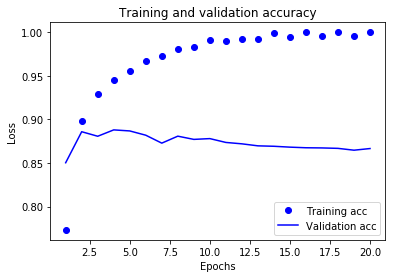

In [12]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 2 hidden layers (32 units)

In [13]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 154us/step - loss: 0.4327 - acc: 0.8143
Epoch 2/4
25000/25000 [==============================] - 3s 140us/step - loss: 0.2437 - acc: 0.9108
Epoch 3/4
25000/25000 [==============================] - 4s 142us/step - loss: 0.1905 - acc: 0.9301
Epoch 4/4
25000/25000 [==============================] - 4s 155us/step


### 2 hidden layers (64 units)

In [14]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 5s 186us/step - loss: 0.4294 - acc: 0.8084
Epoch 2/4
25000/25000 [==============================] - 4s 168us/step - loss: 0.2383 - acc: 0.9080
Epoch 3/4
25000/25000 [==============================] - 4s 167us/step - loss: 0.1826 - acc: 0.9296
Epoch 4/4
25000/25000 [==============================] - 5s 185us/step


### 2 hidden layers (128 units)  

In [15]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 7s 275us/step - loss: 0.4287 - acc: 0.8074
Epoch 2/4
25000/25000 [==============================] - 6s 251us/step - loss: 0.2357 - acc: 0.9068
Epoch 3/4
25000/25000 [==============================] - 6s 259us/step - loss: 0.1602 - acc: 0.9381
Epoch 4/4
25000/25000 [==============================] - 6s 246us/step


### MSE loss function

In [16]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 162us/step - loss: 0.1414 - acc: 0.8156 1s - loss
Epoch 2/4
25000/25000 [==============================] - 4s 149us/step - loss: 0.0725 - acc: 0.9110
Epoch 3/4
25000/25000 [==============================] - 4s 146us/step - loss: 0.0542 - acc: 0.9326
Epoch 4/4
25000/25000 [==============================] - 4s 141us/step


### TANH activation function

In [17]:
model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 150us/step - loss: 0.1287 - acc: 0.8233
Epoch 2/4
25000/25000 [==============================] - 3s 131us/step - loss: 0.0662 - acc: 0.9145
Epoch 3/4
25000/25000 [==============================] - 3s 134us/step - loss: 0.0525 - acc: 0.9325
Epoch 4/4
25000/25000 [==============================] - 4s 166us/step


### Hometask 2

In [28]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [29]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [30]:
from keras.utils.np_utils import to_categorical

y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [31]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

### 1 hidden layer

In [33]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_1_32 = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 314us/step - loss: 0.6522 - acc: 0.8409 - val_loss: 0.2983 - val_acc: 0.8898
Epoch 2/20
15000/15000 [==============================] - 4s 278us/step - loss: 0.2260 - acc: 0.9189 - val_loss: 0.3286 - val_acc: 0.8663
Epoch 3/20
15000/15000 [==============================] - 4s 258us/step - loss: 0.1682 - acc: 0.9403 - val_loss: 0.2971 - val_acc: 0.8818
Epoch 4/20
15000/15000 [==============================] - 4s 265us/step - loss: 0.1344 - acc: 0.9530 - val_loss: 0.2974 - val_acc: 0.8853
Epoch 5/20
15000/15000 [==============================] - 4s 267us/step - loss: 0.1071 - acc: 0.9625 - val_loss: 0.3581 - val_acc: 0.8749
Epoch 6/20
15000/15000 [==============================] - 4s 270us/step - loss: 0.0858 - acc: 0.9702 - val_loss: 0.3685 - val_acc: 0.8788
Epoch 7/20
15000/15000 [==============================] - 4s 287us/step - loss: 0.0699 - acc: 0.9763 - val_loss: 0.3996 - 

### 2 hidden layers (32 units)

In [34]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_2_32 = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 300us/step - loss: 0.7102 - acc: 0.8037 - val_loss: 0.3923 - val_acc: 0.8312
Epoch 2/20
15000/15000 [==============================] - 4s 254us/step - loss: 0.2348 - acc: 0.9146 - val_loss: 0.3283 - val_acc: 0.8673
Epoch 3/20
15000/15000 [==============================] - 5s 306us/step - loss: 0.1660 - acc: 0.9382 - val_loss: 0.3480 - val_acc: 0.8688
Epoch 4/20
15000/15000 [==============================] - 5s 306us/step - loss: 0.1287 - acc: 0.9551 - val_loss: 0.3226 - val_acc: 0.8860
Epoch 5/20
15000/15000 [==============================] - 4s 260us/step - loss: 0.0958 - acc: 0.9661 - val_loss: 0.3749 - val_acc: 0.8759
Epoch 6/20
15000/15000 [==============================] - 4s 284us/step - loss: 0.0709 - acc: 0.9761 - val_loss: 0.4262 - val_acc: 0.8774
Epoch 7/20
15000/15000 [==============================] - 4s 247us/step - loss: 0.0498 - acc: 0.9837 - val_loss: 0.5048 - 

### 2 hidden layers (64 units)

In [35]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_2_64 = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 349us/step - loss: 0.5734 - acc: 0.8117 - val_loss: 0.3038 - val_acc: 0.8750
Epoch 2/20
15000/15000 [==============================] - 5s 308us/step - loss: 0.2199 - acc: 0.9165 - val_loss: 0.4073 - val_acc: 0.8397
Epoch 3/20
15000/15000 [==============================] - 5s 309us/step - loss: 0.1575 - acc: 0.9401 - val_loss: 0.3410 - val_acc: 0.8772
Epoch 4/20
15000/15000 [==============================] - 5s 317us/step - loss: 0.1042 - acc: 0.9605 - val_loss: 0.5302 - val_acc: 0.8355
Epoch 5/20
15000/15000 [==============================] - 5s 309us/step - loss: 0.0686 - acc: 0.9744 - val_loss: 0.4443 - val_acc: 0.8776
Epoch 6/20
15000/15000 [==============================] - 5s 345us/step - loss: 0.0385 - acc: 0.9859 - val_loss: 0.6060 - val_acc: 0.8712
Epoch 7/20
15000/15000 [==============================] - 5s 327us/step - loss: 0.0219 - acc: 0.9931 - val_loss: 0.6852 - 

### 2 hidden layers (128 units)

In [36]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_2_128 = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 469us/step - loss: 0.5049 - acc: 0.8044 - val_loss: 0.3300 - val_acc: 0.8669
Epoch 2/20
15000/15000 [==============================] - 7s 448us/step - loss: 0.2080 - acc: 0.9185 - val_loss: 0.3437 - val_acc: 0.8692
Epoch 3/20
15000/15000 [==============================] - 8s 516us/step - loss: 0.1321 - acc: 0.9491 - val_loss: 0.3425 - val_acc: 0.8789
Epoch 4/20
15000/15000 [==============================] - 7s 443us/step - loss: 0.0679 - acc: 0.9735 - val_loss: 0.4433 - val_acc: 0.8777
Epoch 5/20
15000/15000 [==============================] - 7s 465us/step - loss: 0.0277 - acc: 0.9911 - val_loss: 0.6454 - val_acc: 0.8543
Epoch 6/20
15000/15000 [==============================] - 7s 495us/step - loss: 0.0125 - acc: 0.9965 - val_loss: 0.6888 - val_acc: 0.8756
Epoch 7/20
15000/15000 [==============================] - 7s 442us/step - loss: 0.0074 - acc: 0.9985 - val_loss: 0.7901 - 

### 3 hidden layers 

In [37]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_3_32 = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 327us/step - loss: 0.8468 - acc: 0.7545 - val_loss: 0.3132 - val_acc: 0.8784
Epoch 2/20
15000/15000 [==============================] - 4s 270us/step - loss: 0.2403 - acc: 0.9073 - val_loss: 0.3021 - val_acc: 0.8789
Epoch 3/20
15000/15000 [==============================] - 4s 272us/step - loss: 0.1716 - acc: 0.9355 - val_loss: 0.3414 - val_acc: 0.8710
Epoch 4/20
15000/15000 [==============================] - 4s 275us/step - loss: 0.1255 - acc: 0.9528 - val_loss: 0.4417 - val_acc: 0.8589
Epoch 5/20
15000/15000 [==============================] - 4s 274us/step - loss: 0.0899 - acc: 0.9674 - val_loss: 0.4148 - val_acc: 0.8730
Epoch 6/20
15000/15000 [==============================] - 4s 266us/step - loss: 0.0598 - acc: 0.9786 - val_loss: 0.4718 - val_acc: 0.8716
Epoch 7/20
15000/15000 [==============================] - 4s 276us/step - loss: 0.0353 - acc: 0.9875 - val_loss: 0.5857 - 